In [24]:
import pandas as pd
%matplotlib inline 

### 导入数据

In [25]:
titanic=pd.read_csv('exp01 泰坦尼克号数据.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


|单词|翻译|
|---:|:---|
|pclass|社会阶层(1,精英;2,中层;3,船员/劳苦大众)|
|survived|是否幸存|
|name|姓名|
|sex|性别|
|age|年龄|
|sibsp|兄弟姐妹个数sibling spouse|
|parch|父母子女个数|
|ticker|船票号|
|fare|船票价钱|
|cabin|船舱|
|embarked|登船口|

In [26]:
#显示各列的状态
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [27]:
#对有数值的列进行简单统计
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [28]:
#空格
titanic.isnull().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


In [29]:
#空格统计
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 处理空值

In [30]:
#所有空值填入0
#titanic.fillna(0)

#Age列所有空值填入0
#titanic.Age.fillna(0)

#Age列所有空值填入中位值
#titanic.Age.fillna(titanic.Age.median())

#Age列所有空值填入中位值，但不返回新的Series
titanic.Age.fillna(titanic.Age.median(),inplace=True)
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 从性别分析生还率

In [31]:
#性别统计
titanic.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [32]:
#生还者中，男女人数
survived=titanic[titanic.Survived==1].Sex.value_counts()

In [33]:
#未生还者中，男女人数
dead=titanic[titanic.Survived==0].Sex.value_counts()

,female,male
survived,233,109
dead,81,468


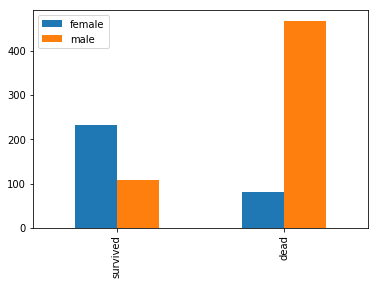

In [34]:
df=pd.DataFrame([survived,dead],index=['survived','dead'])
df.plot.bar()
df

,survived,dead
female,233,81
male,109,468


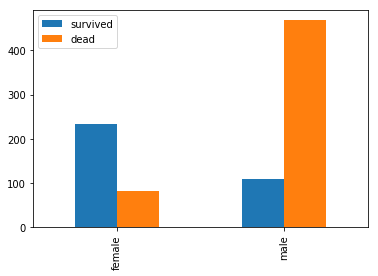

In [35]:
df=df.T  #转置
df.plot.bar()
df

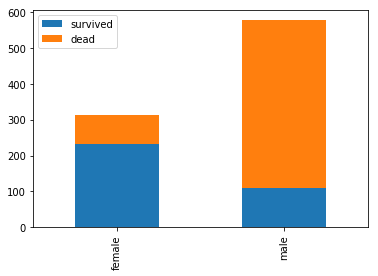

In [36]:
df.plot.bar(stacked=True)

,survived,dead,p_survived,p_dead
female,233,81,0.742038,0.257962
male,109,468,0.188908,0.811092


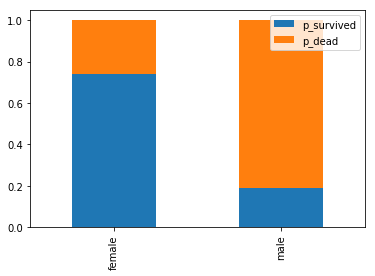

In [37]:
#不同性别生还比例
df['p_survived']=df.survived/(df.survived+df.dead)
df['p_dead']=df.dead/(df.survived+df.dead)
df[['p_survived','p_dead']].plot.bar(stacked=True)
df

### 从年龄分析

In [38]:
#方括号根据Survived的值进行筛选，筛选后显示age
survived=titanic[titanic.Survived==1].Age
dead=titanic[titanic.Survived==0].Age
df=pd.DataFrame([survived,dead],index=['survived','dead'])
df

,0,1,2,3,4,5,6,7,8,9,...,881,882,883,884,885,886,887,888,889,890
survived,NaN,38.0,26.0,35.0,NaN,NaN,NaN,NaN,27.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,19.0,NaN,26.0,NaN
dead,22.0,NaN,NaN,NaN,35.0,28.0,54.0,2.0,NaN,NaN,...,33.0,22.0,28.0,25.0,39.0,27.0,NaN,28.0,NaN,32.0


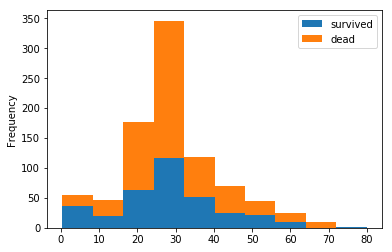

In [39]:
df=df.T
df.plot.hist(stacked=True)

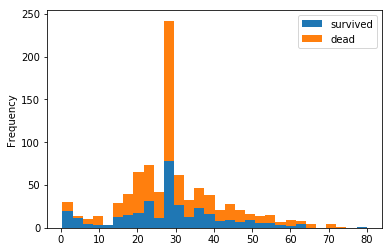

In [42]:
#直方图多显示几根柱子
df.plot.hist(stacked=True,bins=30)

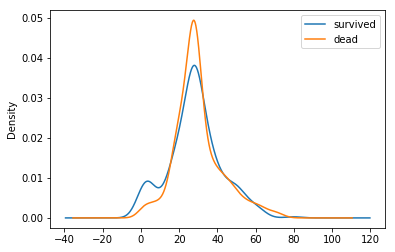

In [44]:
#这里用密度图更直观
df.plot.kde()

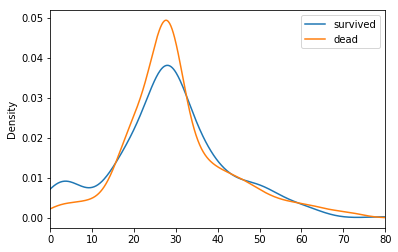

In [50]:
#密度图横轴限定范围
df.plot.kde(xlim=(0,80))

### 对年龄进行聚类

       dead  survived
young    45        55
old     515       293


,dead,survived,p_survived,p_dead
young,45,55,0.550000,0.450000
old,515,293,0.362624,0.637376


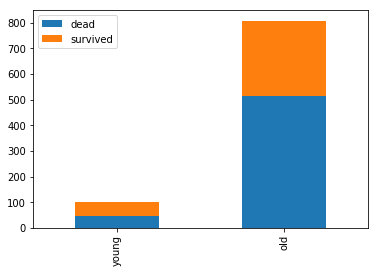

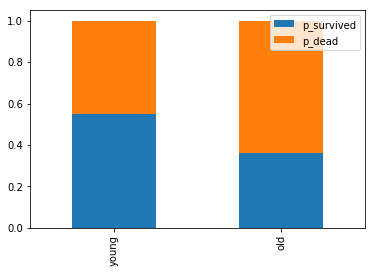

In [57]:
age=16
young=titanic[titanic.Age<=age]['Survived'].value_counts()
old=titanic[titanic.Age>=age]['Survived'].value_counts()
df=pd.DataFrame([young,old],index=['young','old'])
df.columns=['dead','survived']
print(df)
df.plot.bar(stacked=True)
df['p_survived']=df.survived/(df.survived+df.dead)
df['p_dead']=df.dead/(df.survived+df.dead)
df[['p_survived','p_dead']].plot.bar(stacked=True)
df

### 从票价分析

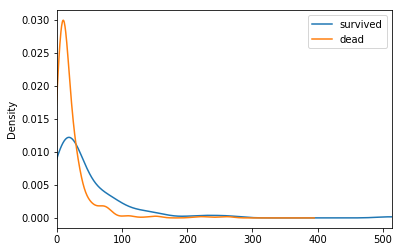

In [62]:
survived=titanic[titanic.Survived==1].Fare
dead=titanic[titanic.Survived==0].Fare
df=pd.DataFrame([survived,dead],index=['survived','dead'])
df=df.T
df.plot.kde(xlim=(0,513))

## 组合特征

### 同时从年龄和票价分析

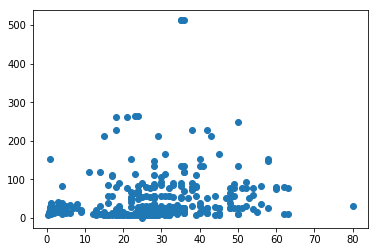

In [64]:
import matplotlib.pyplot as plt
#以年龄和票价为两个坐标，并标出所有生还者的位置
plt.scatter(titanic[titanic.Survived==1].Age,titanic[titanic.Survived==1].Fare)

Text(0, 0.5, 'fare')

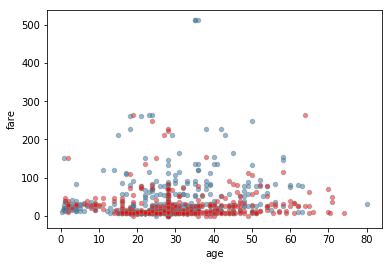

In [71]:
#美化
ax=plt.subplot()

#死亡统计
age=titanic[titanic.Survived==1].Age
fare=titanic[titanic.Survived==1].Fare
plt.scatter(age,fare,s=20,marker='o',alpha=0.5,linewidths=1,edgecolors='gray')

#生还统计
age=titanic[titanic.Survived==0].Age
fare=titanic[titanic.Survived==0].Fare
plt.scatter(age,fare,s=20,marker='o',alpha=0.5,linewidths=1,edgecolors='gray',c='red')

ax.set_xlabel('age')
ax.set_ylabel('fare')